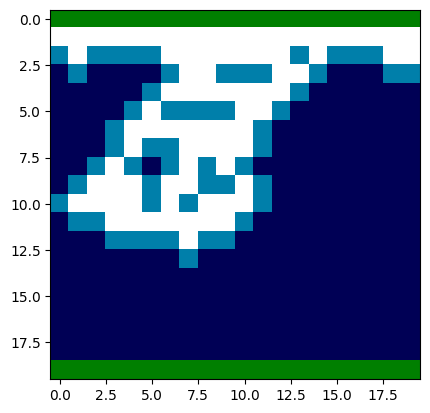

In [22]:
 import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import imageio.v2 as imageio
from collections import deque
import os
import imageio.v3 as iio

os.makedirs('images', exist_ok=True)



L = 20
p = 0.5

lattice = np.ones((L, L)) * (-1)
tossing = np.random.random((L, L)) < p
queue = deque()

lattice[0] *= 2
lattice[-1] *= 2

lattice[1] *= -1

for i in range(L):
    queue.append([1,i])

def toss(i, j):
    j = j % L
   # i = i % L
    if lattice[i][j] == -1:
        if tossing[i, j]:
            lattice[i, j] = 1
            queue.append([i,j])
        else:
            lattice[i, j] = 0

n = 0
images = [ ]

while len(queue) > 0:
    i, j = queue.popleft()

    toss(i+1, j)
    toss(i-1, j)
    toss(i, j+1)
    toss(i, j-1)



    plt.imshow(lattice, cmap='ocean', interpolation='nearest')
    name = f'images/{n}.png'
    n += 1
    plt.savefig(name)

    image = iio.imread(name)
    images.append(image)



iio.imwrite('images/roll.gif', images, duration = 500, loop = 0)











In [25]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import os
import imageio.v3 as iio

os.makedirs('images', exist_ok=True)


def percolate(L, p):
    lattice = np.ones((L, L)) * (-1)
    tossing = np.random.random((L, L)) < p
    queue = deque()

    lattice[0] *= 2
    lattice[-1] *= 2

    lattice[1] *= -1

    for i in range(L):
        queue.append([1,i])

    def toss(i, j):
        j = j % L
       # i = i % L
        if lattice[i][j] == -1:
            if tossing[i, j]:
                lattice[i, j] = 1
                queue.append([i,j])
            else:
                lattice[i, j] = 0


    while len(queue) > 0:
        i, j = queue.popleft()

        toss(i+1, j % L)
        toss(i-1, j % L)
        toss(i, j+1 % L)
        toss(i, j-1 % L)


    isPercolating = np.sum(lattice[-2] == 1) > 0

    size = np.sum(lattice == 1)

    return isPercolating, size


n = 100
ps = np.arange(0.54, 0.64, 0.01)
Ls = np.array([20, 50, 100])


P = np.array([])
for p in ps:
    X = 0.
    sizeAverage = 0
    for _ in range(n):
        isPercolating, size = percolate(L, p)
        if isPercolating:
            X += 1

    probability = X / n
    P = np.append(P, [p, probability])

plt.plot(P[:, 0], P[:, 1])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig("images/verlet_energy.png")
plt.show()












IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed